In [107]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from numpy import loadtxt
# import xgboost

In [97]:
df = pd.read_csv('D:\ISI_Kolkata\TrainingData\TrainingData.csv')
df.head(5)
df.columns
df["Length_Bs"] = df.Bitstream.astype(str).map(len)

In [98]:
def train_test_val_split(X, y, train_size, val_size, test_size, random_state=42):
    """
    Splits X and y into training, validation, and test sets.

    Args:
    - X: pandas dataframe or array containing the independent variables.
    - y: pandas series or array containing the dependent variable.
    - train_size: float between 0 and 1 indicating the proportion of the data to include in the training set.
    - val_size: float between 0 and 1 indicating the proportion of the data to include in the validation set.
    - test_size: float between 0 and 1 indicating the proportion of the data to include in the test set.
    - random_state: int or None, optional (default=42). The seed used by the random number generator.

    Returns:
    - X_train: pandas dataframe or array containing the independent variables for the training set.
    - X_val: pandas dataframe or array containing the independent variables for the validation set.
    - X_test: pandas dataframe or array containing the independent variables for the test set.
    - y_train: pandas series or array containing the dependent variable for the training set.
    - y_val: pandas series or array containing the dependent variable for the validation set.
    - y_test: pandas series or array containing the dependent variable for the test set.

    Raises:
    - AssertionError: if the sum of train_size, val_size, and test_size is not equal to 1.
    """

    assert train_size + val_size + test_size == 1, "Train, validation, and test sizes must add up to 1."
    
    # Concatenate X and y into a single dataframe
    df = pd.concat([X, y], axis=1)
    
    # Split the dataframe into training and test sets
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=random_state)
    
    # Calculate the size of the validation set relative to the original dataframe
    val_ratio = val_size / (1 - test_size)
    
    # Split the training set into training and validation sets
    train_df, val_df = train_test_split(train_df, test_size=val_ratio, random_state=random_state)
    
    # Split the training, validation, and test dataframes into X and y values
    X_train, y_train = train_df.drop(columns=['class']), train_df[['class']]
    X_val, y_val = val_df.drop(columns=['class']), val_df[['class']]
    X_test, y_test = test_df.drop(columns=['class']), test_df[['class']]
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [99]:
print(df.info())
print(df.shape)
print(df.Length_Bs.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   CID        250000 non-null  int64 
 1   Bitstream  250000 non-null  object
 2   class      250000 non-null  int64 
 3   Length_Bs  250000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.6+ MB
None
(250000, 4)
[64]


In [143]:
# from bitarray import bitarray
# bins = df['Bitstream'][0]
# # bts = bitarray(bins)
# # ascs = bts.tobytes().decode('ascii')
# # print("The normal string is: ", ascs)
# # print(type(ascs))

# binary_values = bins.split()


# ascii_string = ""
# for binary_value in binary_values:
#     an_integer = int(binary_value, 2)
#     ascii_character = chr(an_integer)
#     ascii_string += ascii_character
# print(ascii_string)

In [144]:
def bin_to_text(binary):
  byte_array = [int(binary[i:i + 8], 2) for i in range(0, len(binary), 8)]
  return ''.join([chr(x) for x in byte_array])

64
ëj¿èÞ


In [145]:
import re
df['Splt_2'] = df.Bitstream.apply(lambda x: re.findall('..', x))
df['Splt_4'] = df.Bitstream.apply(lambda x: re.findall('....', x))
df['Splt_8'] = df.Bitstream.apply(lambda x: re.findall('........', x))
df['Splt_16'] = df.Bitstream.apply(lambda x: re.findall('................', x))
df['Splt_32'] = df.Bitstream.apply(lambda x: re.findall('................................', x))

df_apr_2 = df[['CID','Splt_2','class']]
df_apr_4 = df[['CID','Splt_4','class']]
df_apr_8 = df[['CID','Splt_8','class']]
df_apr_16 = df[['CID','Splt_16','class']]
df_apr_32 = df[['CID','Splt_32','class']]


df_apr_2_v1 = pd.DataFrame(df_apr_2['Splt_2'].tolist())
df_apr_2_v2 =  df_apr_2_v1.add_prefix('col_')
df_apr_2_v3 =  pd.concat([df_apr_2, df_apr_2_v2], axis=1)
df_apr_2_v3 = df_apr_2_v3.drop(columns=['Splt_2'])

df_apr_4_v1 = pd.DataFrame(df_apr_4['Splt_4'].tolist())
df_apr_4_v2 =  df_apr_4_v1.add_prefix('col_')
df_apr_4_v3 =  pd.concat([df_apr_4, df_apr_4_v2], axis=1)
df_apr_4_v3 = df_apr_4_v3.drop(columns=['Splt_4'])


df_apr_8_v1 = pd.DataFrame(df_apr_8['Splt_8'].tolist())
df_apr_8_v2 =  df_apr_8_v1.add_prefix('col_')
df_apr_8_v3 =  pd.concat([df_apr_8, df_apr_8_v2], axis=1)
df_apr_8_v3 = df_apr_8_v3.drop(columns=['Splt_8'])


df_apr_16_v1 = pd.DataFrame(df_apr_16['Splt_16'].tolist())
df_apr_16_v2 =  df_apr_16_v1.add_prefix('col_')
df_apr_16_v3 =  pd.concat([df_apr_16, df_apr_16_v2], axis=1)
df_apr_16_v3 = df_apr_16_v3.drop(columns=['Splt_16'])


df_apr_32_v1 = pd.DataFrame(df_apr_32['Splt_32'].tolist())
df_apr_32_v2 =  df_apr_32_v1.add_prefix('col_')
df_apr_32_v3 =  pd.concat([df_apr_32, df_apr_32_v2], axis=1)
df_apr_32_v3 = df_apr_32_v3.drop(columns=['Splt_32'])

# df_v2 = df_v2.drop(columns=['col_0','col_65'])
# df_apr_2_v2.head(3)
# df_v2 = df.Bitstream.str.split('',expand= True)
# df_v2 =  df_v2.add_prefix('col_')
# df_v2 = df_v2.drop(columns=['col_0','col_65'])
print("Shape of dataframe for approach 2 : ", df_apr_2_v3.shape)
print("Shape of dataframe for approach 4 : ", df_apr_4_v3.shape)
print("Shape of dataframe for approach 8 : ", df_apr_8_v3.shape)
print("Shape of dataframe for approach 16 : ", df_apr_16_v3.shape)
print("Shape of dataframe for approach 32 : ", df_apr_32_v3.shape)

Shape of dataframe for approach 2 :  (250000, 34)
Shape of dataframe for approach 4 :  (250000, 18)
Shape of dataframe for approach 8 :  (250000, 10)
Shape of dataframe for approach 16 :  (250000, 6)
Shape of dataframe for approach 32 :  (250000, 4)


In [154]:
bins = df['Bitstream'][3]
# a = '0110010101100001011100100111100101110101011100110110100101111001'
print(len(bins))
print(bin_to_text(bins))

64
r½EäX,ß


In [102]:
# Approach 1 :  Split the bits into multiple columns and concatenate with base dataframe with class 

df_v2 = df.Bitstream.str.split('',expand= True)
df_v2 =  df_v2.add_prefix('col_')
df_v2 = df_v2.drop(columns=['col_0','col_65'])

df_v3 =  pd.concat([df, df_v2], axis=1)
df_v3 = df_v3.drop(columns=['Bitstream'])
df_v3.head(3)

,CID,class,Length_Bs,col_1,col_2,col_3,col_4,col_5,col_6,col_7,...,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64
0,293436,0,64,1,1,1,0,1,0,1,...,1,0,0,0,0,1,1,1,0,0
1,233249,0,64,1,1,0,0,1,1,1,...,1,1,0,1,0,0,0,1,1,0
2,32011,0,64,1,0,1,0,0,0,1,...,0,1,1,1,0,1,0,1,0,1


In [82]:
x = df_v3.drop(columns= ['class'])
y = df_v3[['class']]
X_train, X_val, X_test, y_train, y_val, y_test = train_test_val_split(x, y,0.7, 0.1, 0.2, random_state=42)
print('X_train shape:', X_train.shape, 'y_train_shape:',y_train.shape)
print('X_train shape:', X_test.shape, 'y_train_shape:',y_test.shape)
print('X_train shape:', X_val.shape, 'y_train_shape:',y_val.shape)

In [132]:
x.head(3)

,CID,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64
0,293436,1,1,1,0,1,0,1,1,0,...,1,0,0,0,0,1,1,1,0,0
1,233249,1,1,0,0,1,1,1,1,1,...,1,1,0,1,0,0,0,1,1,0
2,32011,1,0,1,0,0,0,1,0,0,...,0,1,1,1,0,1,0,1,0,1


In [113]:
def evaluation(y_test,y_hat):
    cm = confusion_matrix(y_test, y_hat)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    accuracy = accuracy_score(y_test, y_hat)
    precision = precision_score(y_test, y_hat)
    recall = recall_score(y_test, y_hat)
    print("Accuracy: %.3f" % accuracy)
    print("precision: %.3f" % precision)
    print("recall: %.3f" % recall)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-115-a891fb60989d>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


evaluation matrix of Logistic Regression
Accuracy: 0.497
precision: 0.000
recall: 0.000
evaluation matrix of random Forest


c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.499
precision: 0.503
recall: 0.451


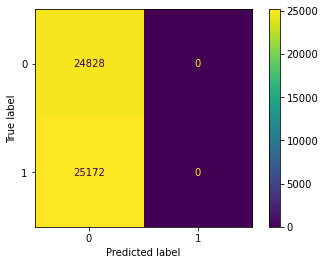

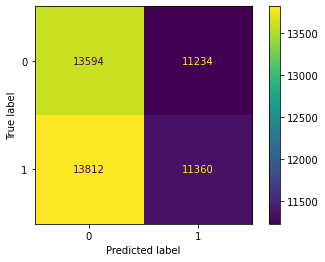

In [115]:
# from sklearn.linear_model import LogisticRegression as lr 
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, y_train)

# random forest fit
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# make predictions
yhat_lr = lr.predict(X_test)
yhat_rf = rf.predict(X_test)
# evaluate predictions
print("evaluation matrix of Logistic Regression")
evaluation(y_test, yhat_lr)
print("evaluation matrix of random Forest")
evaluation(y_test, yhat_rf)


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31
0,11,10,10,11,00,00,11,00,01,10,...,11,10,10,01,01,10,00,01,11,00
1,11,00,11,11,10,00,01,10,11,11,...,00,01,11,10,00,11,01,00,01,10
2,10,10,00,10,00,00,01,11,00,00,...,10,11,01,00,00,01,11,01,01,01


In [128]:
df_apr_2_v1.head(3)

,0
0,NaN
1,NaN
2,NaN
